<a href="https://colab.research.google.com/github/thaliaramoss/python/blob/main/Dominos_x_EasterEagles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##O problema

Os dados referenciados abaixo mostram o diâmetro de Pizzas medidas na Austrália. A pizzaria EagleBoys afirma que suas pizzas são maiores do que as da pizzaria Dominos. Para provar isso, eles realizaram um conjunto de medições e as publicaram. Normalmente, não é esperado que cada pizza produzida por um restaurante tenha exatamente o mesmo tamanho, mas deve-se esperar algo próximo entre as pizzas produzidas.

Veja que essa não é apenas uma história engraçada. O gerente de uma pizzaria precisa controlar custos e trazer clientela. Considerando duas pizzas de mesmo sabor, tipo de massa e preço, uma pizza maior significa menor lucro naquela pizza, enquanto que uma pizza menor do que o esperado implica em desagradar o cliente. Parece não haver uma estratégia única para determinar a medida certa para manter seu lucro, e isso dá origem à diferentes abordagens pelas pizzarias. Será que veremos estratégias diferentes nestes dados?

### O que fazer?

Agora você vai investigar os dados destas medições. Explore os dados usando o que você aprendeu e anote o que foi observado. Apresente um link de compartilhamento do seu colab, compartilhado para comentários. Ele deve conter código e texto explicativo.

### Questões motivadoras

As questões abaixo não são exaustivas, mas apenas um guia. Tente elaborar suas próprias questões ao analisar os dados.

Que tipos de variáveis temos no conjunto de dados?
Será que a alegação da pizzaria EagleBoys tem alguma base?
O tipo de massa (crust, em inglês) ou o sabor (topping, em inglês) impactam no tamanho da pizza?
Haveria alguma explicação para as diferenças?

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/pizzasize.csv",encoding='ISO-8859-1')

In [ ]:
display(df)

,ID,Store,CrustDescription,Topping,Diameter
0,1,Dominos,ThinNCrispy,Supreme,29.40
1,2,Dominos,ThinNCrispy,BBQMeatlovers,29.63
2,3,Dominos,DeepPan,Hawaiian,27.06
3,4,Dominos,ThinNCrispy,Supreme,27.45
4,5,Dominos,ClassicCrust,Hawaiian,26.59
...,...,...,...,...,...
245,248,Dominos,ThinNCrispy,Supreme,28.84
246,249,Dominos,DeepPan,BBQMeatlovers,26.36
247,250,Dominos,DeepPan,Hawaiian,26.11
248,251,Dominos,ThinNCrispy,BBQMeatlovers,29.14


### Tipos de variáveis

In [ ]:
df.head()

,ID,Store,CrustDescription,Topping,Diameter
0,1,Dominos,ThinNCrispy,Supreme,29.40
1,2,Dominos,ThinNCrispy,BBQMeatlovers,29.63
2,3,Dominos,DeepPan,Hawaiian,27.06
3,4,Dominos,ThinNCrispy,Supreme,27.45
4,5,Dominos,ClassicCrust,Hawaiian,26.59


Baseado nos resultados encontrados, verificamos que:

- Store, CrustDescription e Topping são variáveis categóricas

- Diameter são variáveis contínuas

---
Vamos gráficos para visualizar melhor estes dados, faremos um gráfico para analisar nossas variáveis

In [ ]:
import matplotlib.pyplot as plt

(24.0, 32.0)

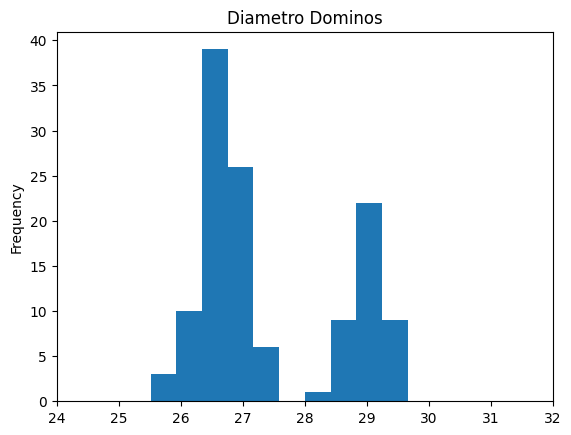

In [ ]:
dominos = df[df["Store"] == "Dominos"]

dominos["Diameter"].div(1).plot.hist(title="Diametro Dominos")
plt.xlim(24, 32)

(24.0, 32.0)

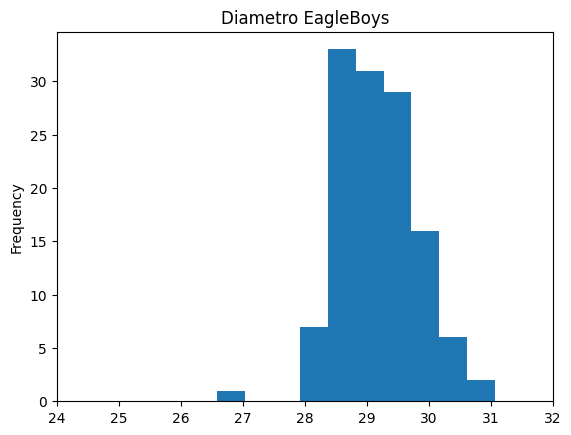

In [ ]:
eagleboys = df[df["Store"] == "EagleBoys"]

eagleboys["Diameter"].div(1).plot.hist(title="Diametro EagleBoys")
plt.xlim(24, 32)

Baseando-se nos gráficos verificamos que os diâmetros das pizzas da Dominos tem um aspecto bimodal, com dois pontos onde os dados estão concentrados. Verificamos, ainda, que a maior quantidade de pizzas estão entre os diâmetos de 26 e 27cm.

Olhando para o EagleBoys, verifica-se que há uma concentração de dados entre os valorees de 28 ~ 31.

Se analisarmos somente esses gráficos podemos verificar que o diâmetro é uma variável a se considerar em relação a afirmação de EagleBoys, visto que as pizzas dessa companhia apresentam em sua maior parte um diâmetro maior que as da Dominos

A média, também, pode nos retornar um resultado interessante para verificar o impacto do diâmetro nessa análise.

Baseando-se nessa medida podemos ter o diâmetro como uma base para verificar se a alegação é procedente ou não.

In [ ]:
dominos['Diameter'].mean()

27.442080000000004

In [ ]:
eagleboys['Diameter'].mean()

29.17432

Baseando-se na média, verificamos que a EagleBoys ganhou mais pontos em relação a essa disputa, visto que obteu uma média de diâmetros maior que a da Dominos

Agora vamos verificar o impacto das nossas outras variáveis em relação ao diâmetro, verificaremos, assim, a influência delas na no tamanho da pizza

<Axes: title={'center': 'Diameter'}, xlabel='CrustDescription'>

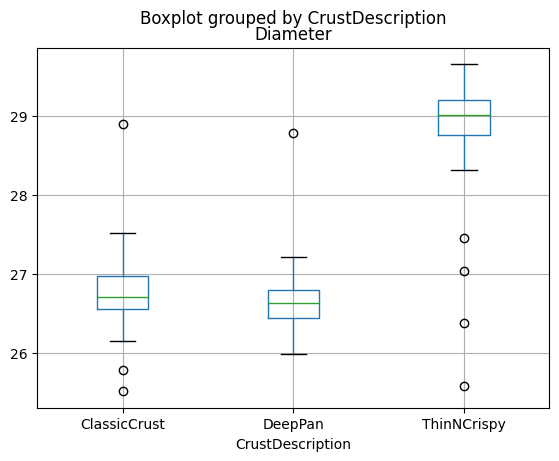

In [ ]:
dominos.boxplot(column="Diameter",by="CrustDescription")

<Axes: title={'center': 'Diameter'}, xlabel='Topping'>

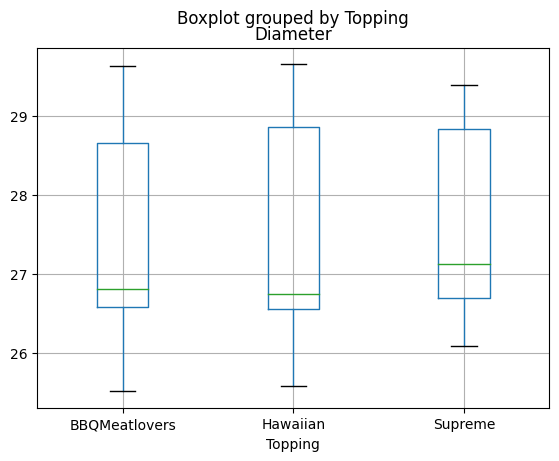

In [ ]:
dominos.boxplot(column="Diameter",by="Topping")

Analisando o boxplot da Dominos, verificamos que o tipo de massa influência do tamanho da pizza. Verificamos que as pizzas que possuem massa do tipo ThinNCripy possuem um diâmetro maior.

Olhando para o Topping, verificamos que não há tanta diferença assim.

Concluimos que para o Dominos, o tipo de massa faz diferença no tamanho da pizza

<Axes: title={'center': 'Diameter'}, xlabel='CrustDescription'>

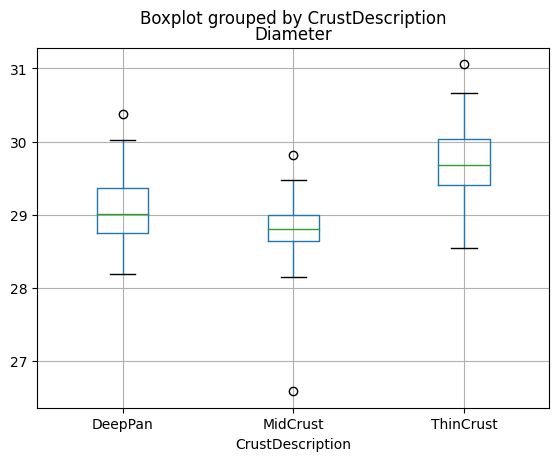

In [ ]:
eagleboys.boxplot(column="Diameter",by="CrustDescription")

<Axes: title={'center': 'Diameter'}, xlabel='Topping'>

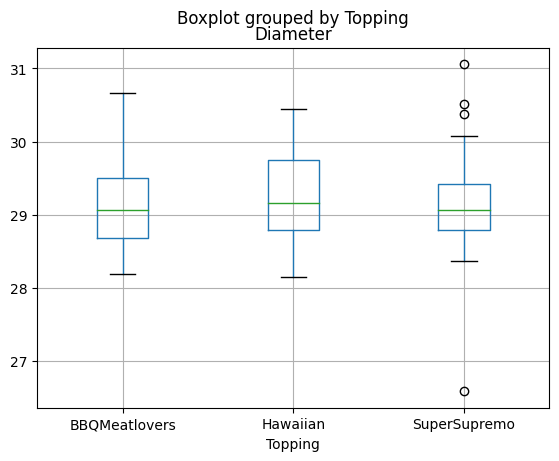

In [ ]:
eagleboys.boxplot(column="Diameter",by="Topping")

Agora, fazendo a análise do EagleBoys, verificamos que, também, o tipo de massa ThinCrust, ou seja, a mais fina possui uma quantidade de pizzas com diâmetro maior. Percebe-se, também, que o EagleBoys tendem a regular o tamanho de suas pizzas pelas massas, visto que independente da massa o diâmetro é elevado

Olhando para o Topping, verificamos valores outliers que influenciam no diâmetro, principalemnte no SuperSupremo

Concluimos pela análise que, de fato, as pizzas do EagleBoys tendem a ser maiores que a de Dominos, e que o tipo de massa influencia no tamanho, sendo as mais finas possuem maior o diâmetro.